## CMPINF 2100 - Final project feedback

### Spotify songs

This report gives general feedback from the proposals abouot the final project. In addition to addressing pitfalls, multiple recommendations are provided to help with the analysis.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df = pd.read_csv(data_url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

## Comments

### Id variables

The data set has several ID variables, `track_id`, `track_album_id`, `playlist_id`. The data set also has names for the songs, album, and playlist. None of these variables should be used as inputs to predictive models. 

The data dictionary provided by the Tidy Tuesday github page states that `track_id` is a unique song ID. Let's check this by applying `.nunique()` to the `track_id` column. As shown below there are fewer unique values for `track_id` than rows in the data set!

In [4]:
df.track_id.nunique()

28356

The `.value_counts()` method is applied twice in the cell below. The first `.value_counts()` call counts the number of rows per unique `track_id`. The second `.value_counts()` call counts the number of songs that have 1 row, 2 rows, 3 rows, and so on. As we see below there is one song that has 10 rows associated with it!

In [5]:
df.track_id.value_counts().value_counts()

1     25190
2      2384
3       510
4       142
5        60
6        35
7        17
8        15
9         2
10        1
Name: track_id, dtype: int64

The song with 10 rows is:

In [6]:
df.track_id.value_counts()[df.track_id.value_counts() == 10]

7BKLCZ1jbUBVqRi2FVlTVw    10
Name: track_id, dtype: int64

Let's display all rows in the original data set with this `track_id` value. Scrolling through the columns of the displayed rows we see that the columns are the same **except** for those associated with the play list!

In [7]:
df.loc[ df.track_id.isin(df.track_id.value_counts()[df.track_id.value_counts() == 10].index.to_list()), :]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960


Let's check a few of the songs that appear 3 times in the data set.

In [8]:
df.track_id.value_counts()[df.track_id.value_counts() == 3][:3]

5Hroj5K7vLpIG4FNCRIjbP    3
37FfCz1YODL6NAuWfxUzJh    3
26BkXpWAaajgL2Eh9TA95B    3
Name: track_id, dtype: int64

In [9]:
df.loc[ df.track_id.isin(df.track_id.value_counts()[df.track_id.value_counts() == 3][:3].index.to_list()), :].sort_values('track_popularity')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
28301,37FfCz1YODL6NAuWfxUzJh,Left Right,Hardwell,58,3192TqWaoGyc53bEHlcl45,Left Right,2019-10-18,Big Room EDM,3S03NWbWkrR1e7DPH9rf9Z,edm,...,10,-3.768,0,0.0666,0.000373,0.353000,0.2850,0.192,128.005,155827
29830,37FfCz1YODL6NAuWfxUzJh,Left Right,Hardwell,58,3192TqWaoGyc53bEHlcl45,Left Right,2019-10-18,EDM 2019,1T0ed6Mg0QIruHvcoWWIKy,edm,...,10,-3.768,0,0.0666,0.000373,0.353000,0.2850,0.192,128.005,155827
32072,37FfCz1YODL6NAuWfxUzJh,Left Right,Hardwell,58,3192TqWaoGyc53bEHlcl45,Left Right,2019-10-18,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,10,-3.768,0,0.0666,0.000373,0.353000,0.2850,0.192,128.005,155827
6598,26BkXpWAaajgL2Eh9TA95B,"Givenchy Bag (feat. Future, Nafe Smallz & Chip)",Wiley,61,3kMflVVnVzgLP7EjQbidFU,"Givenchy Bag (feat. Future, Nafe Smallz & Chip)",2019-10-03,Rap Workout,37i9dQZF1DX76t638V6CA8,rap,...,11,-6.280,0,0.2690,0.382000,0.000000,0.0875,0.826,97.225,172500
21966,26BkXpWAaajgL2Eh9TA95B,"Givenchy Bag (feat. Future, Nafe Smallz & Chip)",Wiley,61,3kMflVVnVzgLP7EjQbidFU,"Givenchy Bag (feat. Future, Nafe Smallz & Chip)",2019-10-03,Chixtape 5 - Tory Lanez,0UXwwVDipbBQeEX7h4YuKU,r&b,...,11,-6.280,0,0.2690,0.382000,0.000000,0.0875,0.826,97.225,172500
23645,26BkXpWAaajgL2Eh9TA95B,"Givenchy Bag (feat. Future, Nafe Smallz & Chip)",Wiley,61,3kMflVVnVzgLP7EjQbidFU,"Givenchy Bag (feat. Future, Nafe Smallz & Chip)",2019-10-03,"Latest Hits 2020 - Pop, Hip Hop & RnB",7FqZlaYKkQmVnguJbHuj2a,r&b,...,11,-6.280,0,0.2690,0.382000,0.000000,0.0875,0.826,97.225,172500
1777,5Hroj5K7vLpIG4FNCRIjbP,Best Day Of My Life,American Authors,76,0V4laGZGshNCpurfIdUhHv,"Oh, What A Life",2014-01-01,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,2,-2.392,1,0.0346,0.059100,0.000262,0.0558,0.538,100.012,194240
4636,5Hroj5K7vLpIG4FNCRIjbP,Best Day Of My Life,American Authors,76,0V4laGZGshNCpurfIdUhHv,"Oh, What A Life",2014-01-01,Intro to Indie Poptimism,6Ylmweq4pT7j3ScIv5uq1c,pop,...,2,-2.392,1,0.0346,0.059100,0.000262,0.0558,0.538,100.012,194240
20723,5Hroj5K7vLpIG4FNCRIjbP,Best Day Of My Life,American Authors,76,0V4laGZGshNCpurfIdUhHv,"Oh, What A Life",2014-01-01,Today's Hits 2000-Present,6a66cg3HcsjYkisYyQcov6,latin,...,2,-2.392,1,0.0346,0.059100,0.000262,0.0558,0.538,100.012,194240


Again we see that the columns are the same **except** for the play list related columns! Since the unique `track_id` seems to be appearing in multiple playlists, let's check the number of unique `playlist_id` values.

In [10]:
df.playlist_id.nunique()

471

Next, let's consider the number of rows associated with each combination of `track_id` and `playlist_id`.

In [11]:
df.groupby(['track_id', 'playlist_id']).size().reset_index(name='num_rows')

,track_id,playlist_id,num_rows
0,0017A6SJgTbfQVU2EtsPNo,37i9dQZF1DWYDQ8wBxd7xt,1
1,002xjHwzEx66OWFV2IP9dk,0JmBB9HfrzDiZoPVRdv8ns,1
2,004s3t0ONYlzxII9PLgU6z,3YouF0u7waJnolytf9JCXf,1
3,008MceT31RotUANsKuzy3L,5TiiHps0hNCyQ6ijVkNZQs,1
4,008rk8F6ZxspZT4bUlkIQG,37i9dQZF1DXdOtZGKonFlM,1
...,...,...,...
32246,7zxRMhXxJMQCeDDg0rKAVo,6HaCi9bqaiuSZEDfCEmwyo,1
32247,7zyLObYw4QUKQDyZOb4J0Y,4sji14lrB5bgcr51lPALYH,1
32248,7zycSpvjDcqh6YT1FEl2kY,1kEczIkZH8IgaWT2BiApxZ,1
32249,7zye9v6B785eFWEFYs13C2,5EMARioe9z9eKOeWIAC2JW,1


Applying `.value_counts()` to the number of rows per combination of `track_id` and `playlist_id`, `num_rows`, reveals 31719 `track_id` and `playlist_id` combinations appear once and only once. However, over 500 combinations appear more than once!

In [12]:
df.groupby(['track_id', 'playlist_id']).size().reset_index(name='num_rows').num_rows.value_counts()

1    31719
2      482
3       50
Name: num_rows, dtype: int64

What if we count the number of rows associated with each combination of `track_id`, `track_album_id`, and `playlist_id`? The cell below does just that. Look closely at the number of rows associated with the resulting DataFrame. The result has the same number of rows as our previous grouping!

In [13]:
df.groupby(['track_id', 'track_album_id', 'playlist_id']).size().reset_index(name='num_rows')

,track_id,track_album_id,playlist_id,num_rows
0,0017A6SJgTbfQVU2EtsPNo,1srJQ0njEQgd8w4XSqI4JQ,37i9dQZF1DWYDQ8wBxd7xt,1
1,002xjHwzEx66OWFV2IP9dk,1ficfUnZMaY1QkNp15Slzm,0JmBB9HfrzDiZoPVRdv8ns,1
2,004s3t0ONYlzxII9PLgU6z,3z04Lb9Dsilqw68SHt6jLB,3YouF0u7waJnolytf9JCXf,1
3,008MceT31RotUANsKuzy3L,1Z4ANBVuhTlS6DprlP0m1q,5TiiHps0hNCyQ6ijVkNZQs,1
4,008rk8F6ZxspZT4bUlkIQG,2BuYm9UcKvI0ydXs5JKwt0,37i9dQZF1DXdOtZGKonFlM,1
...,...,...,...,...
32246,7zxRMhXxJMQCeDDg0rKAVo,4JR29CNW14Zc4Z5vflxkoJ,6HaCi9bqaiuSZEDfCEmwyo,1
32247,7zyLObYw4QUKQDyZOb4J0Y,14HYMxFhpgDIr9cci1u0kt,4sji14lrB5bgcr51lPALYH,1
32248,7zycSpvjDcqh6YT1FEl2kY,5qs8T6ZHSrnllnOuUk6muC,1kEczIkZH8IgaWT2BiApxZ,1
32249,7zye9v6B785eFWEFYs13C2,1xdgLmTFMSyJyI5DJOOX7T,5EMARioe9z9eKOeWIAC2JW,1


Applying `.value_counts` to `num_rows` associated with `track_id`, `track_album_id`, and `playlist_id`, reveals that again there over 500 combinations with more than 1 row. 

In [14]:
df.groupby(['track_id', 'track_album_id', 'playlist_id']).size().reset_index(name='num_rows').\
num_rows.value_counts()

1    31719
2      482
3       50
Name: num_rows, dtype: int64

The point of the above exploration is to show that one row is **NOT** one song (track). One row is mostly one track from an album within one play list. However, there are over 500 **DUPLICATED** tracks!

This is important because you will ultimately be predicting the output `track_popularity` based on the track features. You want to make sure you are **not** double, triple, or even 10x counting a single track in your models! 

A thorough exploration therefore needs to check if the duplication of the `track_id` is associated with changes to the output, `track_popularity`, and the inputs of interest. You must do this for the final project, but the cell below demonstrates how to do this for the output, `track_popularity`, and one of the input features, `valence`. 

The cell below groups by the `track_id` and applies the `nunique()` method to count the number of unique values of the variables associated with each `track_id`.

In [15]:
df.groupby(['track_id']).\
aggregate(num_track_pop_values = ('track_popularity', 'nunique'),
          num_valence_values = ('valence', 'nunique')).\
reset_index()

,track_id,num_track_pop_values,num_valence_values
0,0017A6SJgTbfQVU2EtsPNo,1,1
1,002xjHwzEx66OWFV2IP9dk,1,1
2,004s3t0ONYlzxII9PLgU6z,1,1
3,008MceT31RotUANsKuzy3L,1,1
4,008rk8F6ZxspZT4bUlkIQG,1,1
...,...,...,...
28351,7zxRMhXxJMQCeDDg0rKAVo,1,1
28352,7zyLObYw4QUKQDyZOb4J0Y,1,1
28353,7zycSpvjDcqh6YT1FEl2kY,1,1
28354,7zye9v6B785eFWEFYs13C2,1,1


The `.nunique()` method is applied to the grouped and aggregated DataFrame. This reveals that there is 1 and only 1 value for `num_track_pop_values` and `num_valence_values`. Thus, all unique tracks have a single `track_popularity` value and single `valence` value!

In [16]:
df.groupby(['track_id']).\
aggregate(num_track_pop_values = ('track_popularity', 'nunique'),
          num_valence_values = ('valence', 'nunique')).\
reset_index().\
nunique()

track_id                28356
num_track_pop_values        1
num_valence_values          1
dtype: int64

Again you **must** do this to ensure a track does not have different features within the various playlists. After performing these checks you will create the **cleaned** data for modeling by either:  

* Only using the tracks that appear once and only once in the data

**OR**  

* Use a summary statistic such as the average value of the continuous inputs and the most common categorical value across all playlists

Using only unique tracks will reduce the data size, but there are no issues with "ties". If all tracks have just 1 value for all inputs (categorical and continuous) then there are no ties and you have nothing to worry about. However, if one or more of the inputs have different values in different rows then you are summarizing the value for modeling purposes. The choice of summary statistic will impact the modeling behavior, but a choice must be made.

### Date

The `track_album_release_date` variable is an object data type (string). However, as we can see in the previously shown dataframe snippets the `track_album_release_date` "looks" like a calendar date. Unfortunately, due to time we will not discuss datetime variables in this course. This topic is reserved for the following courses, CMPINF 2110 and CMPINF 2120. However, it could be useful to include date information in this application. This report demonstrates how to extract month and date information from the `track_album_release_date` variable. This is accomplished by first converting the variable to a date time object via the `pd.to_datetime()` function.

The `pd.to_datetime()` function is applied to the first 5 rows in the cell below. The print out looks consistent with the display in the previous print outs.

In [17]:
pd.to_datetime( df.track_album_release_date[:5] )

0   2019-06-14
1   2019-12-13
2   2019-07-05
3   2019-07-19
4   2019-03-05
Name: track_album_release_date, dtype: datetime64[ns]

The cell below makes a copy of the data set and then adds in a column `track_album_release_date_dt` which is the datetime converted `track_album_release_date` variable.

In [18]:
df_copy = df.copy()

df_copy['track_album_release_date_dt'] = pd.to_datetime( df.track_album_release_date )

The first 5 rows for the two date style columsn are shown below. Again, the print out looks the same.

In [19]:
df_copy.loc[:5, ['track_id', 'track_album_release_date', 'track_album_release_date_dt']]

,track_id,track_album_release_date,track_album_release_date_dt
0,6f807x0ima9a1j3VPbc7VN,2019-06-14,2019-06-14
1,0r7CVbZTWZgbTCYdfa2P31,2019-12-13,2019-12-13
2,1z1Hg7Vb0AhHDiEmnDE79l,2019-07-05,2019-07-05
3,75FpbthrwQmzHlBJLuGdC7,2019-07-19,2019-07-19
4,1e8PAfcKUYoKkxPhrHqw4x,2019-03-05,2019-03-05
5,7fvUMiyapMsRRxr07cU8Ef,2019-07-11,2019-07-11


But, the two columns are not the same. The `track_album_release_date_dt` column is a datetime object!

In [20]:
df_copy.loc[:, ['track_id', 'track_album_release_date', 'track_album_release_date_dt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     32833 non-null  object        
 1   track_album_release_date     32833 non-null  object        
 2   track_album_release_date_dt  32833 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 769.6+ KB


The datetime conversion is useful here because we have access to all of the datetime related methods! We can extract the year and month associated with the release date! The year and month are attributes of the datetime object which can be accessed via the `.dt.year` and `.dt.month` attributes, respectively.

In [21]:
df_copy['release_year'] = df_copy.track_album_release_date_dt.dt.year

df_copy['release_month'] = df_copy.track_album_release_date_dt.dt.month

The year and month associated with the first 11 rows in the data set are shown below.

In [22]:
df_copy.loc[:11, ['track_id', 'track_album_release_date', 'track_album_release_date_dt', 'release_year', 'release_month']]

,track_id,track_album_release_date,track_album_release_date_dt,release_year,release_month
0,6f807x0ima9a1j3VPbc7VN,2019-06-14,2019-06-14,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,2019-12-13,2019-12-13,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,2019-07-05,2019-07-05,2019,7
3,75FpbthrwQmzHlBJLuGdC7,2019-07-19,2019-07-19,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,2019-03-05,2019-03-05,2019,3
5,7fvUMiyapMsRRxr07cU8Ef,2019-07-11,2019-07-11,2019,7
6,2OAylPUDDfwRGfe0lYqlCQ,2019-07-26,2019-07-26,2019,7
7,6b1RNvAcJjQH73eZO4BLAB,2019-08-29,2019-08-29,2019,8
8,7bF6tCO3gFb8INrEDcjNT5,2019-06-14,2019-06-14,2019,6
9,1IXGILkPm0tOCNeq00kCPa,2019-06-20,2019-06-20,2019,6


With this information we can count the number of songs associated with each release year. As we see below, most of the songs in the data set were released more recently.

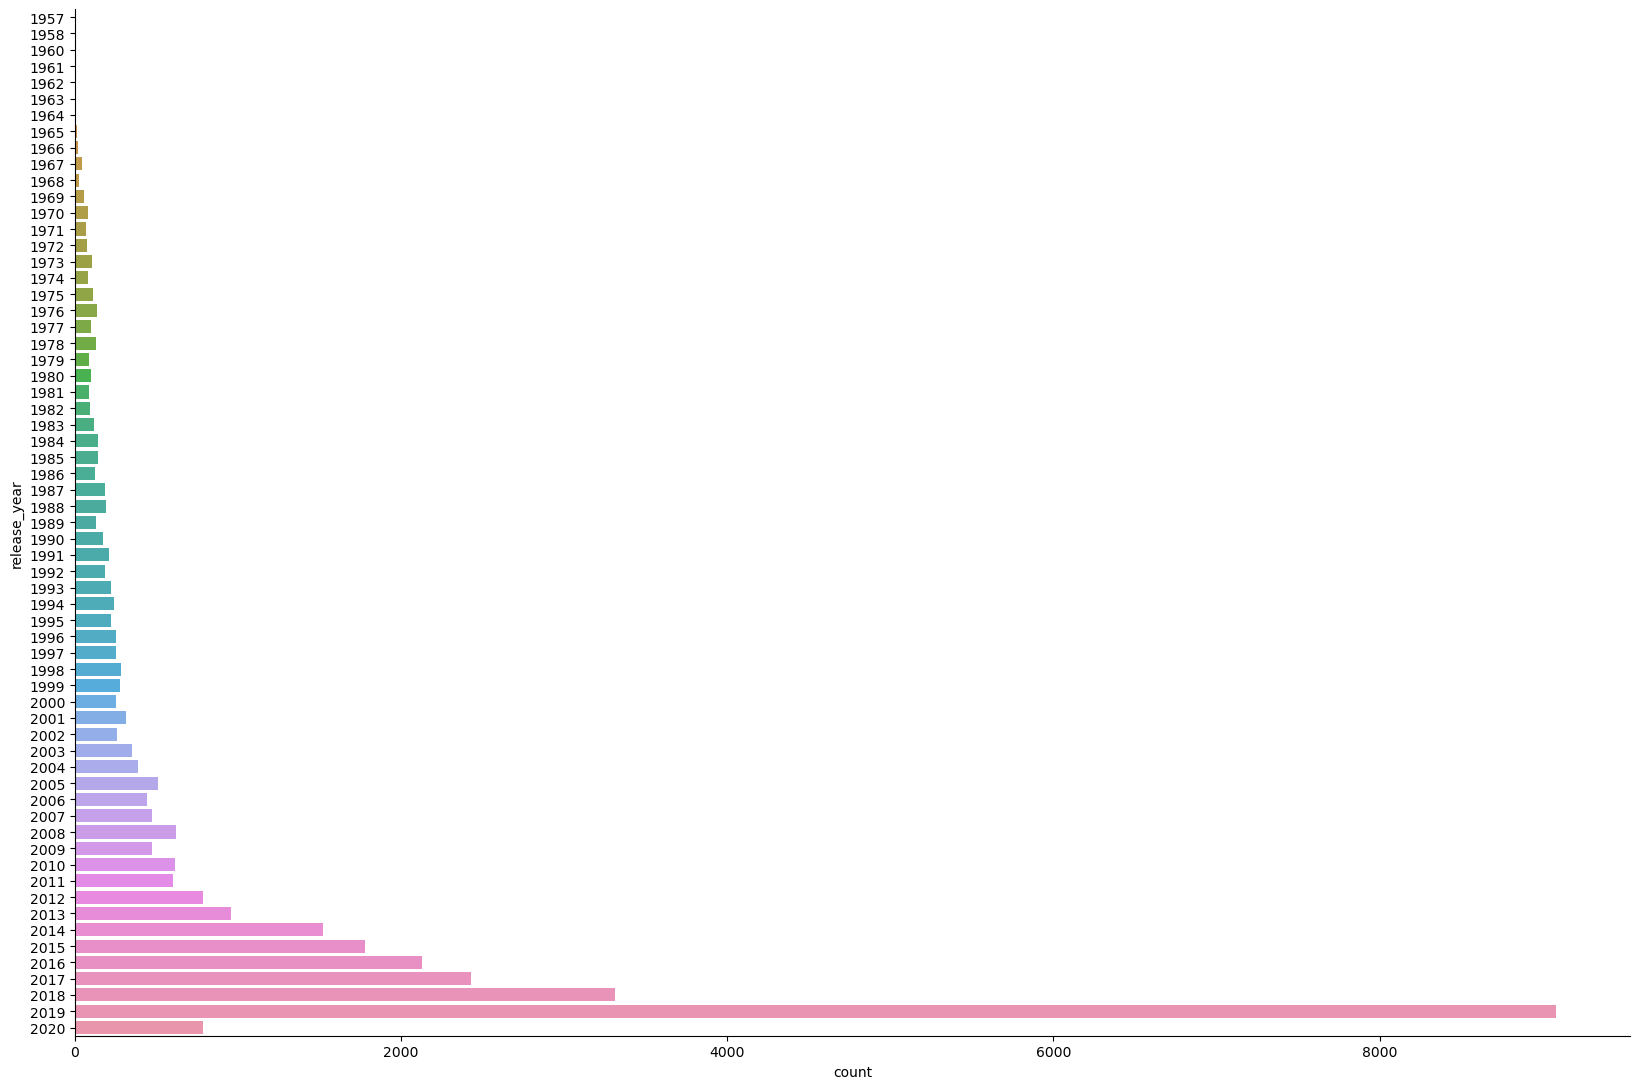

In [23]:
sns.catplot(data = df_copy, y='release_year', kind='count', height=11, aspect=1.5)

plt.show()

We can also consider the number of songs in the data set released per month.

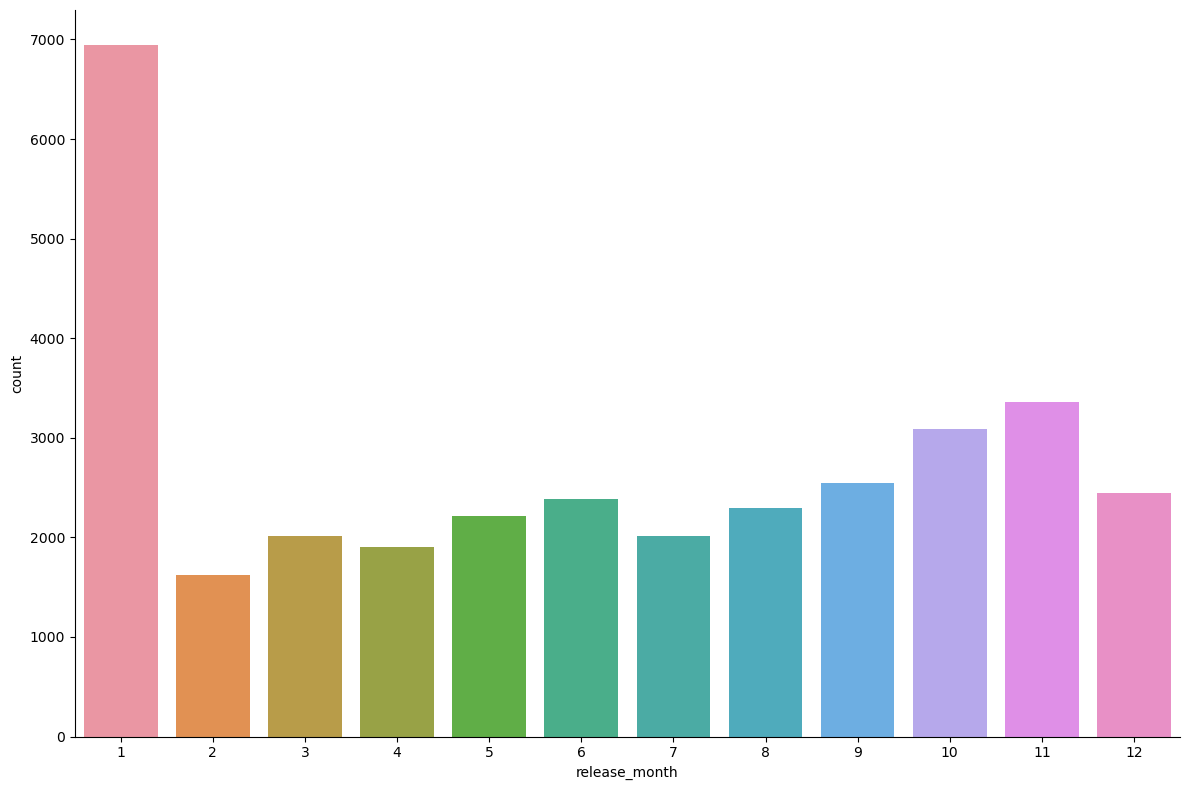

In [24]:
sns.catplot(data = df_copy, x='release_month', kind='count', height=8, aspect=1.5)

plt.show()

Other datetime attributes exist for a datetime object, such as the day of the week. However, I think exploring the potential relationship of year associated with the song and the month it is released is sufficient for this application. I do not know if `release_year` or `release_month` influence the output. That is something for you to find out!

Note the above bar charts were created with the data "as is". The issue of the repeated `track_id` values was not properly accounted for. **That is something for you to handle!**

The `release_year` variable is a numeric quantity. However, as the previous bar chart revealed there are very few observations for songs released prior to the year 2010. Thus, you may want to convert the `release_year` into a categorical variable. If we just want a binary variable, a simple approach to accomplish this is with `np.where()`. For example, let's convert `release_year` into a binary variable with values "recent" and "older" based on if the `release_year` is less than 2010.

In [25]:
df_copy['bin_year'] = np.where( df_copy.release_year < 2010, 'older', 'recent')

Instead of using `release_year` in a predictive, you could use the categorical variable that states if the song is "recent" or "older".

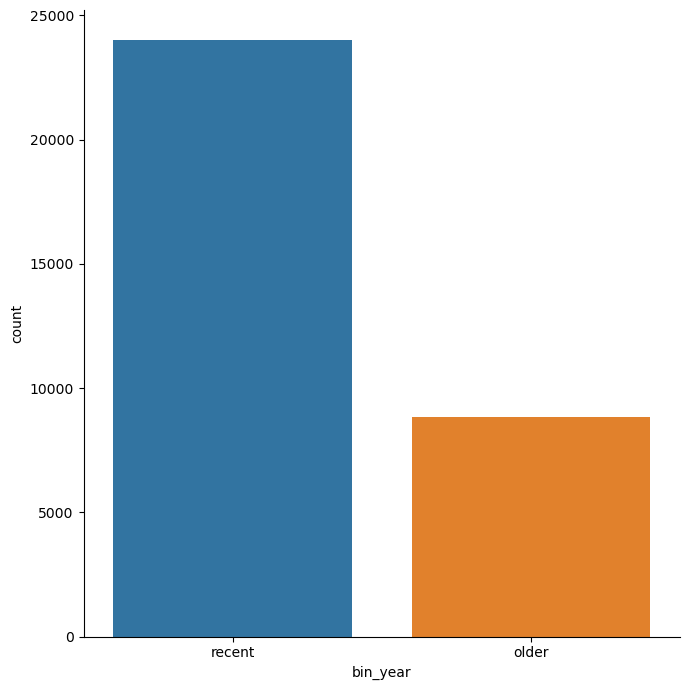

In [26]:
sns.catplot(data = df_copy, x='bin_year', kind='count', height=7)

plt.show()

### input features

The main inputs of interest to this problem are the music or song related features. I would not recommend including the artist name as an input. If you want to include the artist as a feature to the model, you **must** first check the number of features that exist due to the creation of the dummy variables.  

The `playlist_genre` should be investigated in your models. It has relatively few unique values and provides a somewhat meaningful representation of a grouping of the song. You should consider interacting this categorical variable with the music/song related features. It is up to if you would like try `playlist_subgenre` as a feature. If you use `playlist_subgenre`, you should *not* also include `playlist_genre` as an input.

The `key` and `mode` inputs are integers however they are more representative of categorical like variables.

In [27]:
df.loc[:, ['key', 'mode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   key     32833 non-null  int64
 1   mode    32833 non-null  int64
dtypes: int64(2)
memory usage: 513.1 KB


They have relatively few unique values.

In [28]:
df.loc[:, ['key', 'mode']].nunique()

key     12
mode     2
dtype: int64

We can check the number of rows associated with each combination of the two variables. The plot below does not handle the track duplication issue. That is up to you to handle!

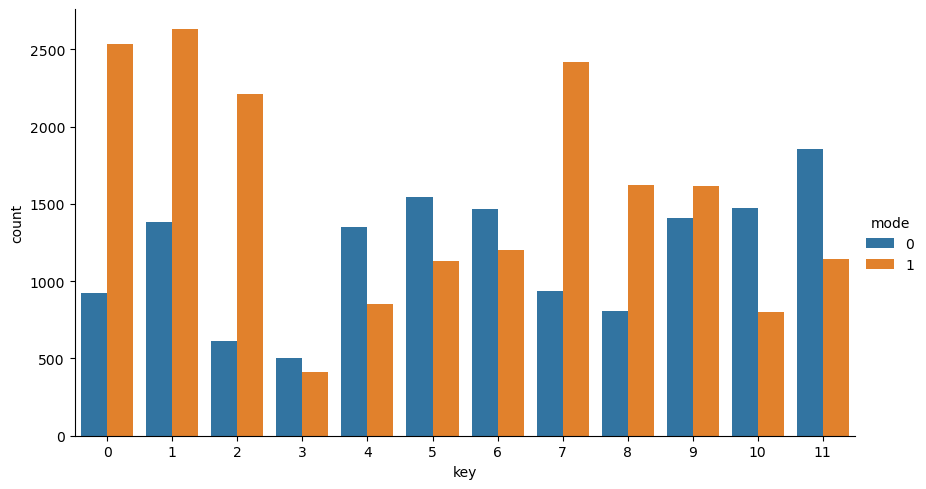

In [29]:
sns.catplot(data = df, x='key', hue='mode', kind='count', aspect=1.75)

plt.show()

You should examine if the continuous input correlation changes across the combinations of `key` and `mode`.

Lastly, you should consider a transformation like a log-transformation to be applied to non-Gaussian like continuous inputs.

### output

The output variable `track_popularity` is an integer between 0 and 100. 

In [30]:
df.track_popularity.describe()

count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

The distribution of the output is visualized with the histogram below. 

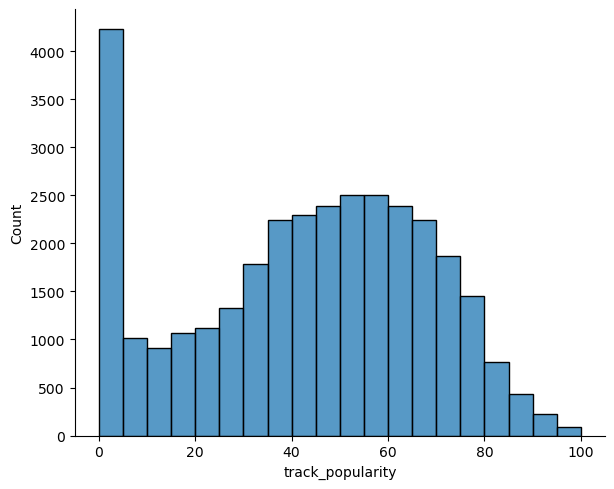

In [31]:
sns.displot(data = df, x='track_popularity', binwidth=5, aspect=1.25)

plt.show()

The histogram reveals a "spike" near zero and so we should check if values identically equal zero. The cell below shows that about 8% of the observations have `track_popularity == 0`.

In [32]:
np.mean( df.track_popularity == 0 )

0.08232570889044559

We also need to check if values identically equal 100.

In [33]:
np.mean( df.track_popularity == 100 )

6.0914324003289374e-05

Because the proportion is so small, let's print those rows to the screen. As shown below, there is only 1 song with a perfect `track_popularity` score of 100! That song is in two different play lists.

In [34]:
df.loc[ df.track_popularity == 100, :]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.4,0,0.0924,0.692,0.000104,0.149,0.513,98.027,209438
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.4,0,0.0924,0.692,0.000104,0.149,0.513,98.027,209438


The reason why we are checking these issues is because `track_popularity` is a **bounded** variable. When we introduced the assumption of regression models, we demonstrated that the likelihood and thus the **sampling distribution** is a Gaussian distribution. Gaussians do not have any bounds. Thus, if we fit a conventional regression model (even advanced methods like neural networks) the model could predict negative values and values greater than 100 for `track_popularity`! 

We discussed in lecture how we can extract the confidence and prediction intervals associated with linear models. These uncertainty intervals will definitely go outside the 0 and 100 bounds for songs near boundaries. Thus, we **CANNOT** apply the regression techniques discussed in class directly to `track_popularity`!

There are several approaches we can use which are more appropriate for this project. If you would be interested in working with a classification problem, you can convert `track_popularity` into a categorical variable. For example, you can classify if the song has a `track_popularity` above 50 and is thus a "good" song. The cell below creates the variable `binary_outcome` which as a value of 1 if `track_popularity > 50` and zero otherwise.

In [35]:
df_copy['binary_outcome'] = np.where( df_copy.track_popularity > 50, 1, 0 )

Although not perfectly balanced, the binary outcome is not overly imbalanced and so conventional classification approaches can be applied. You should check that this is still the case after dealing with the `track_id` repeat issue.

In [36]:
df_copy.binary_outcome.value_counts(normalize=True)

0    0.574757
1    0.425243
Name: binary_outcome, dtype: float64

If you want to work with a classification problem, I recommend first fitting models to classify with `track_popularity > 50`. If that goes well, you can then consider a more imbalanced situation with `track_popularity > 60` or perhaps `track_popularity > 70`. It is critical to first check the balance of the binary classes if you do that though.

However, if you would prefer to work with regression instead of classification, you must apply the logit (log-odds) transformation to the `track_popularity` variable before fitting the models. This transformation will create an **unbounded** variable that is more appropriate for regression methods.

In truth, this application is a **zero-one inflated beta regression** which is quite challenging to work with. You do not need to work with such a method. Instead, we will use a "hack" to enable applying the logit transformation. The "hack" is required because the logit transformation cannot handle values equal to 0 or 1. We will subtract a small number from the values of `track_popularity` if `track_popularity` equals 100. We will also add a small number to `track_popularity` if `track_popularity` equals 0. This will slightly compress the range and make sure no observation has a value identically equal to the lower or upper bound.

The cell below shows how to create this "shifted" variable.

In [37]:
df_copy['track_pop_shift'] = np.where( df_copy.track_popularity == 100, df_copy.track_popularity - 0.1, df_copy.track_popularity)

df_copy['track_pop_shift'] = np.where( df_copy.track_popularity == 0, df_copy.track_popularity + 0.1, df_copy.track_pop_shift )

Let's confirm the min and max values of the shifted variable compared to the original variable. As we see below the bounds are slightly different.

In [38]:
df_copy.loc[:, ['track_popularity', 'track_pop_shift']].describe()

,track_popularity,track_pop_shift
count,32833.000000,32833.000000
mean,42.477081,42.485307
std,24.984074,24.970075
min,0.000000,0.100000
25%,24.000000,24.000000
50%,45.000000,45.000000
75%,62.000000,62.000000
max,100.000000,99.900000


Let's compare the summary statistics with boxplots between the two variables. Visually the summary statistics look the same even though we changed the values at the extreme ends.

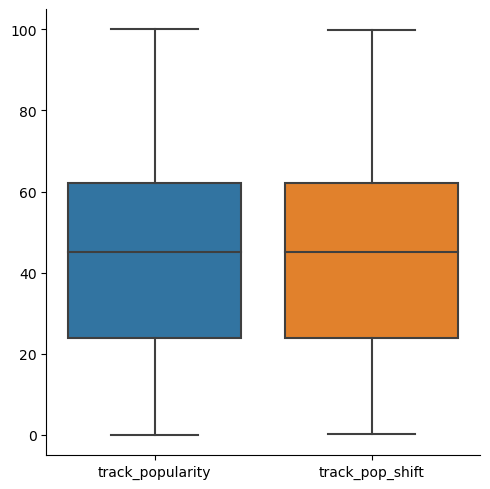

In [39]:
sns.catplot(data = df_copy.loc[:, ['track_popularity', 'track_pop_shift']], kind='box')

plt.show()

The distributions are compared via kernel density estimates below. We can barely even see the orange curve in the figure below, because the two distributions are essentially identical. Our small change therefore does not impact the overall distribution of the output.

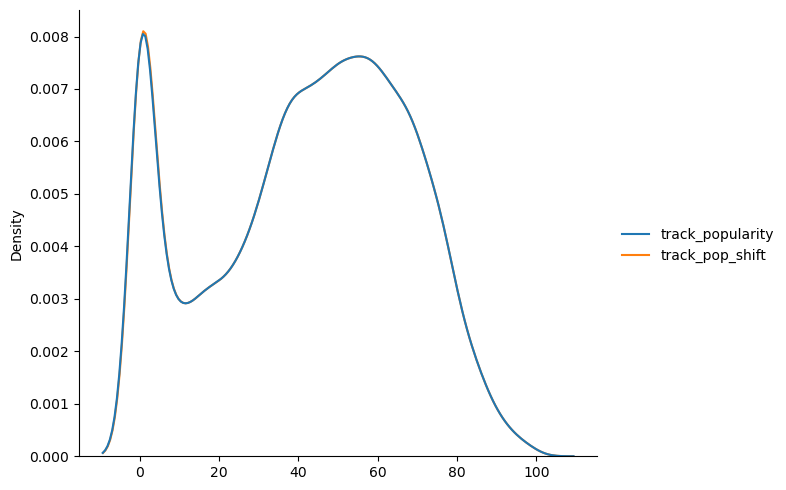

In [40]:
sns.displot(data = df_copy.loc[:, ['track_popularity', 'track_pop_shift']], kind='kde', aspect=1.25)

plt.show()

Let's now calculate the logit transformed output. We must first divide by 100 to make the value a fraction between 0 and 1. The logit (log-odds ratio) is then calculated. The logit transformed output is named `y` for simplicity below.

In [41]:
df_copy['track_pop_frac'] = df_copy.track_pop_shift / 100

df_copy['y'] = np.log( df_copy.track_pop_frac / (1 - df_copy.track_pop_frac) )

The distribution of the logit transformed output is shown below. We see two primary aspects of the distribution. First, the bulk of the distribution is roughly symmetric around zero. However, there is a spike located at `y < -6`. This spike corresponds to the songs with the `track_popularity == 0`! The transformation highlights the zero values even more prominently than the original scaling. 

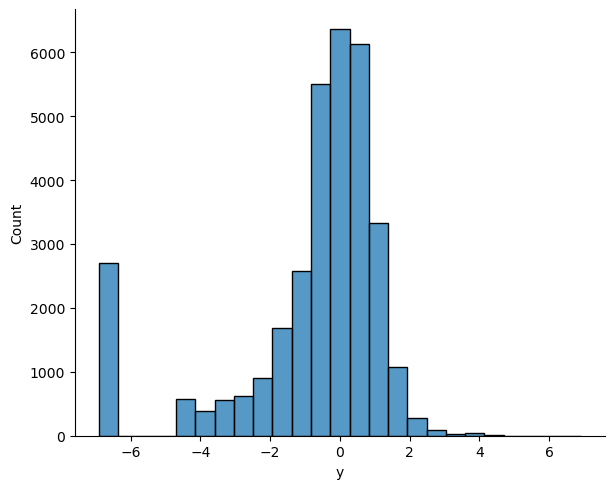

In [42]:
sns.displot(data = df_copy, x='y', kind='hist', bins=25, aspect=1.25)

plt.show()

If you decide to work with the regression problem for this project, you **must** use the logit transformed output instead of the original `track_popularity` variable.